# Step 1. Parameter Setting 

In [1]:
import dtnmonitor_v2 as dtn
import subprocess
def exec_print(command):
    proc = subprocess.Popen([command], stdout=subprocess.PIPE, shell=True)
    (out, err) = proc.communicate()
    print("out:", out)
    print("err:", err)
    
## please edit you /etc/sysctl.conf 
## $ vim /etc/sysctl.conf
#exec_print("cat /etc/sysctl.conf")
graph_mode=1  #0 all, 1 100pt

# Step 2. 100G DTN System Checking Instruction Guild

## 2.1. To change TCP parameters, edit /etc/sysctl.conf as:

In [18]:
# net.core.default_qdisc = fq
# net.core.netdev_max_backlog=250000
# net.ipv4.tcp_no_metrics_save=1
# net.ipv4.tcp_congestion_control=htcp
# net.ipv4.tcp_mtu_probing=1
# net.core.rmem_max=671088640
# net.core.wmem_max=671088640
# net.core.rmem_default=335544320
# net.core.wmem_default=335544320
# net.core.optmem_max=335544320
# net.ipv4.tcp_mem=33554432 335544320 2355443200
# net.ipv4.tcp_rmem = 409600 100873800 2147483647
# net.ipv4.tcp_wmem = 409600 100873800 2147483647

In [19]:
# check it
# show your system config
exec_print("sysctl -a |grep 'net.core\|net.ipv4.tcp'")

out: b'net.core.bpf_jit_enable = 0\nnet.core.busy_poll = 0\nnet.core.busy_read = 0\nnet.core.default_qdisc = fq\nnet.core.dev_weight = 64\nnet.core.message_burst = 10\nnet.core.message_cost = 5\nnet.core.netdev_budget = 300\nnet.core.netdev_max_backlog = 250000\nnet.core.netdev_rss_key = 22:a0:c5:56:27:95:9d:21:ca:1a:68:fe:89:a8:80:31:f6:55:48:ee:51:72:c2:d4:8d:04:63:63:88:3e:69:35:ce:38:9b:64:19:4d:c9:23:8e:72:38:4f:e2:22:8e:cb:d8:1f:05:d6\nnet.core.netdev_tstamp_prequeue = 1\nnet.core.optmem_max = 335544320\nnet.core.rmem_default = 335544320\nnet.core.rmem_max = 671088640\nnet.core.rps_sock_flow_entries = 0\nnet.core.somaxconn = 128\nnet.core.warnings = 1\nnet.core.wmem_default = 335544320\nnet.core.wmem_max = 671088640\nnet.core.xfrm_acq_expires = 30\nnet.core.xfrm_aevent_etime = 10\nnet.core.xfrm_aevent_rseqth = 2\nnet.core.xfrm_larval_drop = 1\nnet.ipv4.tcp_abort_on_overflow = 0\nnet.ipv4.tcp_adv_win_scale = 1\nnet.ipv4.tcp_allowed_congestion_control = htcp cubic reno\nnet.ipv4.tc

## 2.2 update Mellanox driver to the most recent one (4.1) and tuning script package.


In [20]:
### Run the tuning script in priority: 
# sudo mlnx_tune


In [21]:
# check it
exec_print('if [ $(ls /tmp/mlnx_tune_*.log) ];then echo "ok, good";else echo "No, you did not do it"; fi;')

out: b'No, you did not do it\n'
err: None


## 2.3 Bind NIC interrupt with the correct numa cores using:


In [22]:
### /user/sbin/set_irq_affinity_bynode.sh <numa_node> <interface>


In [23]:
# no check command

## 2.4 Check PCIe Width, Speed, Max Payload Size and Max Read Request

In [24]:
#lspci: https://community.mellanox.com/docs/DOC-2496
# /usr/bin/setpci -s 41:00.0 68.W=5000
### Especially set Max Read Request to 4096

In [25]:

exec_print('if [ $(lspci -s 04:00.0 -vvv | grep MaxReadReq) ];then echo "ok, good";else echo "No, you did not do it"; fi;')


out: b'No, you did not do it\n'
err: None


## 2.5. Increase txqueuelen to 10000:


In [26]:
### ifconfig <interface> txqueuelen 10000

In [27]:
exec_print('ifconfig |grep txqueuelen')

out: b'        ether 7c:fe:90:12:bf:ca  txqueuelen 1000  (Ethernet)\n        ether 7c:fe:90:12:bf:ca  txqueuelen 0  (Ethernet)\n        ether 7c:fe:90:12:bf:ca  txqueuelen 0  (Ethernet)\n        ether 0c:c4:7a:a4:b7:fc  txqueuelen 1000  (Ethernet)\n        ether 0c:c4:7a:a4:b7:fd  txqueuelen 1000  (Ethernet)\n        loop  txqueuelen 0  (Local Loopback)\n        ether 52:54:00:0e:4a:1c  txqueuelen 0  (Ethernet)\n'
err: None


## 2.6 Set CPU gonvener setting to performance:

In [28]:
### cpupower frequency-set -g performance

In [29]:
exec_print('cpupower frequency-info -g')

out: b'analyzing CPU 0:\nperformance powersave\n'
err: None


## 2.7. Turn off irqbalance and tuned:

In [30]:
### service  irqbalance stop
### service  tuned stop

In [31]:
exec_print('service irqbalance status |grep active')

out: b'   Active: inactive (dead)\n'
err: None


In [32]:
exec_print('service tuned status |grep active')

out: b'   Active: active (running) since Fri 2017-09-01 12:39:58 CDT; 22min ago\n'
err: None


# Step 3. Just monitor

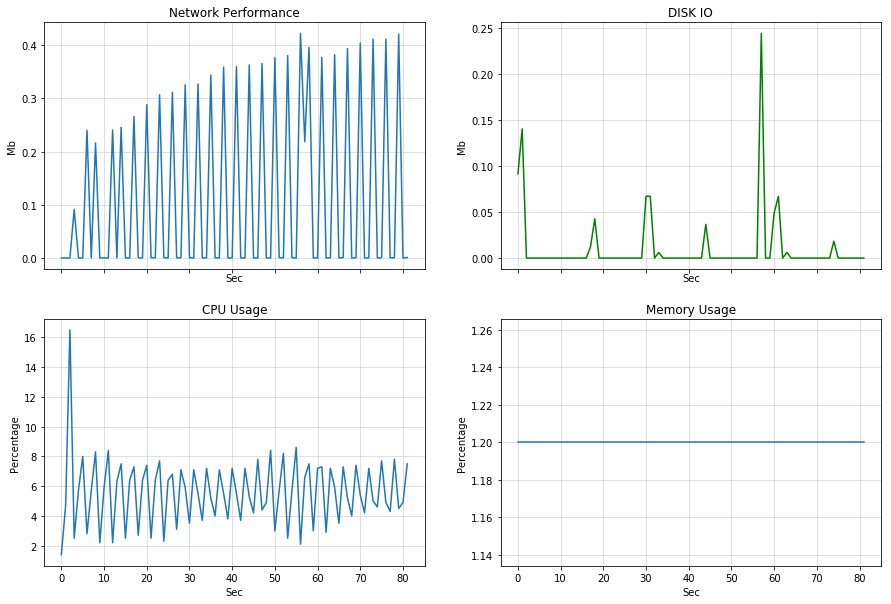

None

In [2]:
## download and monitor
dtn.exec_command("python callmonitor_v2.py",graph_mode)

## you can stop monitoring anytime when you press "interrupt kernel"